<a href="https://colab.research.google.com/github/pratik443/QC-fama-fench/blob/main/QC(white_paper).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsmodels

In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

In [ ]:
import pandas as pd
from pandas_datareader import data as wb
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
end  = dt.date(2021,11,30)
start = dt.date(end.year-5,end.month,end.day)
# we will get funds of  over last 5 years of
# fidelity investments
#vanguard
funds = ['FDGRX','VOO']

In [ ]:
returns = wb.DataReader(funds, start = start, end = end, data_source='yahoo')['Adj Close'].pct_change()

In [ ]:
returns

Symbols,FDGRX,VOO
Date,,
2016-11-30,NaN,NaN
2016-12-01,-0.016391,-0.003903
2016-12-02,0.003561,0.000694
2016-12-05,0.013625,0.005750
2016-12-06,0.006161,0.003499
...,...,...
2021-11-23,-0.005903,0.001303
2021-11-24,0.011164,0.002462
2021-11-26,-0.022081,-0.021760


In [ ]:
returns  = pd.DataFrame(returns)

In [ ]:
returns

In [ ]:
return_cqm = returns.resample('M').agg(lambda x : (x+1).prod()-1)

In [ ]:
return_cqm

In [ ]:
return_cqm = return_cqm[1:]
return_cqm

In [ ]:
factors = wb.DataReader('F-F_Research_Data_Factors','famafrench',start,dt.date(2021,12,12))

In [ ]:
factors

In [ ]:
factors = factors[0]
factors

,Mkt-RF,SMB,HML,RF
Date,,,,
2016-11,4.86,5.67,8.21,0.01
2016-12,1.82,0.09,3.60,0.03
2017-01,1.94,-1.13,-2.74,0.04
2017-02,3.57,-2.04,-1.67,0.04
2017-03,0.17,1.13,-3.33,0.03
2017-04,1.09,0.72,-2.13,0.05
2017-05,1.06,-2.52,-3.75,0.06
2017-06,0.78,2.23,1.49,0.06
2017-07,1.87,-1.46,-0.22,0.07


In [ ]:
factors = factors[1:]

In [ ]:
print('shape of returns',return_cqm.shape)
print('Shape of factors',factors.shape)

shape of returns (60, 2)
Shape of factors (59, 4)


In [ ]:
# so i think so its is till not updated yet so we can drop the returns of the Nov months
return_cqm = return_cqm[:-1]

In [ ]:
print('shape of returns',return_cqm.shape)
print('Shape of factors',factors.shape)

shape of returns (59, 2)
Shape of factors (59, 4)


In [ ]:
return_cqm.index = factors.index
final_dataset = pd.merge(return_cqm,factors,on='Date')
final_dataset

,FDGRX,VOO,Mkt-RF,SMB,HML,RF
Date,,,,,,
2016-12,0.014380,0.020720,1.82,0.09,3.60,0.03
2017-01,0.042989,0.017827,1.94,-1.13,-2.74,0.04
2017-02,0.036380,0.038761,3.57,-2.04,-1.67,0.04
2017-03,0.020223,0.001319,0.17,1.13,-3.33,0.03
2017-04,0.022739,0.010400,1.09,0.72,-2.13,0.05
2017-05,0.046671,0.014044,1.06,-2.52,-3.75,0.06
2017-06,0.007494,0.006296,0.78,2.23,1.49,0.06
2017-07,0.040509,0.020625,1.87,-1.46,-0.22,0.07
2017-08,0.019141,0.002912,0.16,-1.65,-2.07,0.09


In [ ]:
final_dataset[['Mkt-RF','SMB','HML','RF']] = final_dataset[['Mkt-RF','SMB','HML','RF']]/100

##  E(ra) - rf =  βa*(E(rm)-rf) + sa*SMB + ha*HML

In [ ]:
final_dataset['fdgrx-excessret'] = final_dataset['FDGRX']-final_dataset['RF']
final_dataset['voo_excessret'] = final_dataset['VOO']-final_dataset['RF']
final_dataset.head()

,FDGRX,VOO,Mkt-RF,SMB,HML,RF,fdgrx-excessret,voo_excessret
Date,,,,,,,,
2016-12,0.014380,0.020720,0.0182,0.0009,0.0360,0.0003,0.014080,0.020420
2017-01,0.042989,0.017827,0.0194,-0.0113,-0.0274,0.0004,0.042589,0.017427
2017-02,0.036380,0.038761,0.0357,-0.0204,-0.0167,0.0004,0.035980,0.038361
2017-03,0.020223,0.001319,0.0017,0.0113,-0.0333,0.0003,0.019923,0.001019
2017-04,0.022739,0.010400,0.0109,0.0072,-0.0213,0.0005,0.022239,0.009900


In [ ]:
y_voo = final_dataset.voo_excessret
y_fdgrx = final_dataset['fdgrx-excessret']
X = final_dataset[['Mkt-RF','SMB','HML']]
X_sm = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
for y in [y_voo,y_fdgrx]:  
  model = sm.OLS(y,X_sm)
  results = model.fit()
  print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          voo_excessret   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     5094.
Date:                Thu, 16 Dec 2021   Prob (F-statistic):           3.38e-67
Time:                        07:21:47   Log-Likelihood:                 266.48
No. Observations:                  59   AIC:                            -525.0
Df Residuals:                      55   BIC:                            -516.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.871      0.3

### So  now we can see the risk involved with investing in this firms by looking at its coefficients and the draw the plot 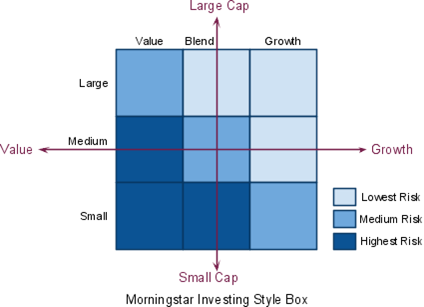

##  E(ra) - rf =  βa*(E(rm)-rf) + sa*SMB + ha*HML